## Kaggle Notebook Analysis 01
- Date : 2021.07.14 20:00~ 
- Subject : Visualization and ML with the Iris Dataset
- Main Point : Introduction to Logistic Regression 
- Reference : 
    - [Python Data Visualizations](https://www.kaggle.com/benhamner/python-data-visualizations) form Kaggle
    - [Machine Learning with Iris Dataset](https://www.kaggle.com/jchen2186/machine-learning-with-iris-dataset) from Kaggle
    - [Logistic Regression](https://ko.wikipedia.org/wiki/%EB%A1%9C%EC%A7%80%EC%8A%A4%ED%8B%B1_%ED%9A%8C%EA%B7%80) from Wiki


In [43]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="white", color_codes=True)

# iris = pd.read_csv("../input/Iris.csv")
iris = sns.load_dataset("iris")

# iris.head()
iris.shape

(150, 5)

In [4]:
iris['species'].value_counts()

setosa        50
virginica     50
versicolor    50
Name: species, dtype: int64

## Seaborn Plot

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='sepal_length', ylabel='sepal_width'>

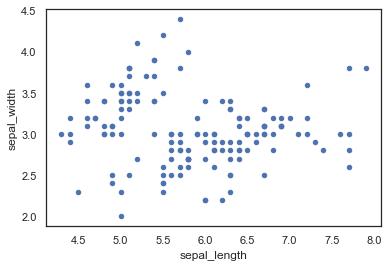

In [5]:
iris.plot(kind="scatter", x="sepal_length", y="sepal_width")

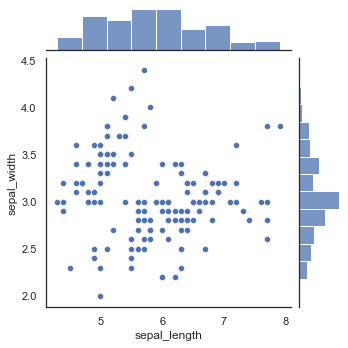

In [9]:
sns.jointplot(x="sepal_length", y="sepal_width", data=iris, size=5)


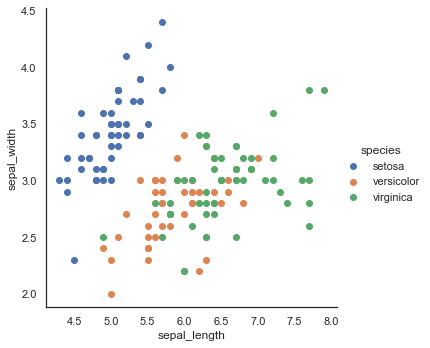

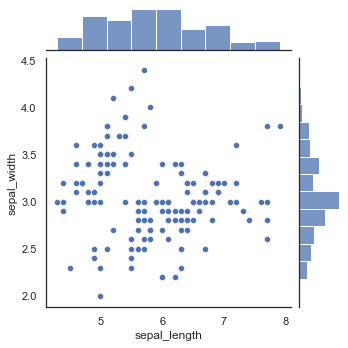

In [18]:
ax = sns.FacetGrid(iris, hue="species", size=5)\
    .map(plt.scatter, "sepal_length", "sepal_width")\
    .add_legend()
ax = sns.jointplot(x="sepal_length", y="sepal_width", data=iris, size=5)


<AxesSubplot:xlabel='species', ylabel='petal_length'>

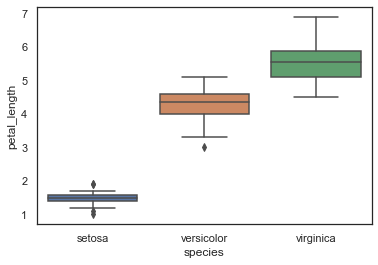

In [11]:
sns.boxplot(x="species", y="petal_length", data=iris)

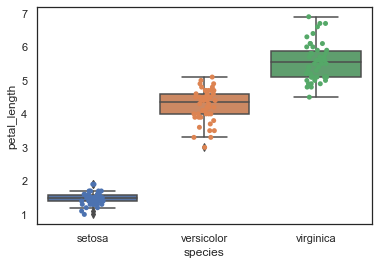

In [20]:
ax = sns.boxplot(x="species", y="petal_length", data=iris)
ax = sns.stripplot(x="species", y="petal_length", data=iris, jitter=True, edgecolor="gray")

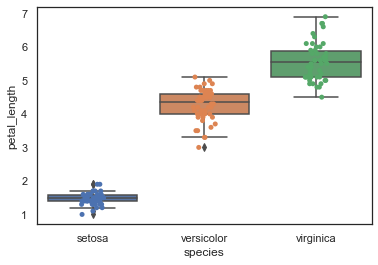

In [22]:
ax = sns.boxplot(x="species", y="petal_length", data=iris)
ax = sns.stripplot(x="species", y="petal_length", data=iris, jitter=True, edgecolor="gray")

<AxesSubplot:xlabel='species', ylabel='petal_length'>

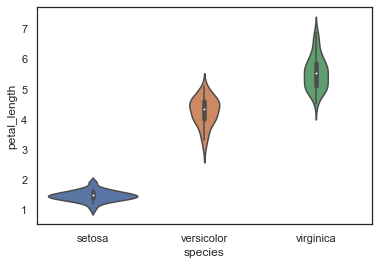

In [25]:
sns.violinplot(x="species", y="petal_length", data=iris, size=20)


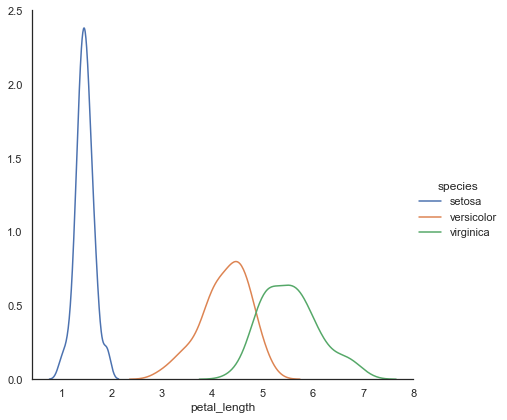

In [27]:
sns.FacetGrid(iris, hue="species", size=6) \
   .map(sns.kdeplot, "petal_length") \
   .add_legend()

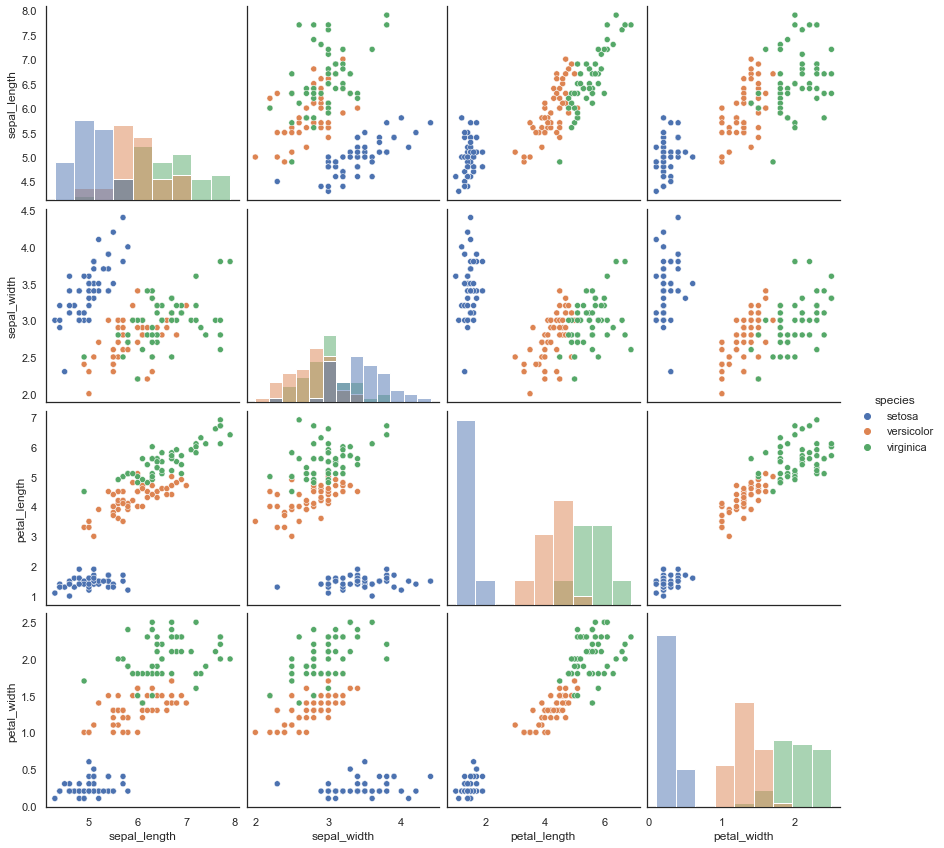

In [30]:
sns.pairplot(iris, hue="species", size=3, diag_kind='hist') # default='kde'(Kernel Density Estimator)


# pandas plot

array([[<AxesSubplot:title={'center':'petal_length'}, xlabel='[species]'>,
        <AxesSubplot:title={'center':'petal_width'}, xlabel='[species]'>],
       [<AxesSubplot:title={'center':'sepal_length'}, xlabel='[species]'>,
        <AxesSubplot:title={'center':'sepal_width'}, xlabel='[species]'>]],
      dtype=object)

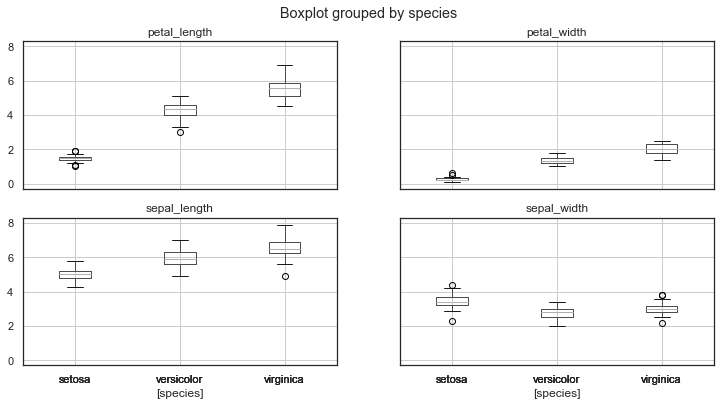

In [32]:
iris.boxplot(by="species", figsize=(12, 6))


<AxesSubplot:>

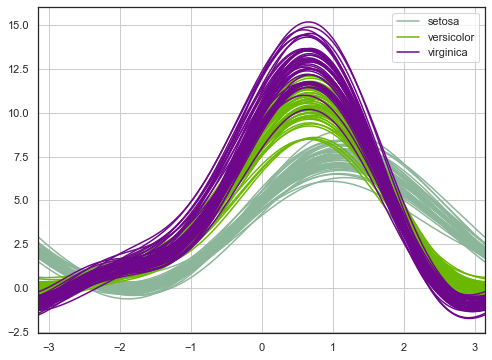

In [36]:
from pandas.plotting import andrews_curves

plt.figure(figsize=(8,6))
andrews_curves(iris, "species")

<AxesSubplot:>

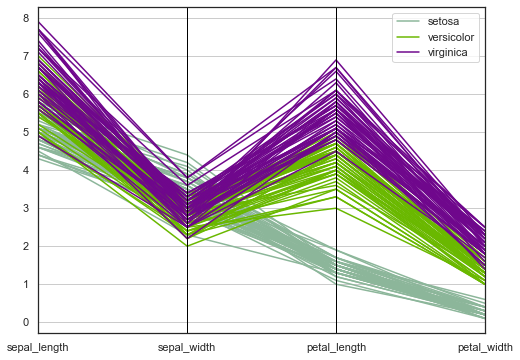

In [38]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(8,6))
parallel_coordinates(iris, "species")

<AxesSubplot:>

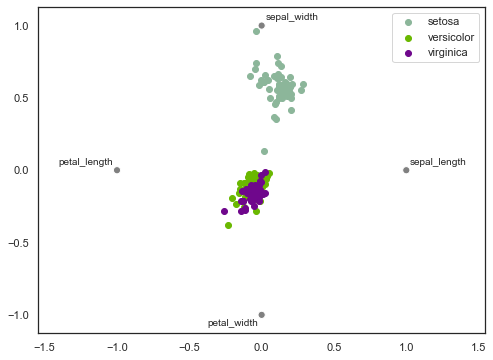

In [42]:
from pandas.plotting import radviz
plt.figure(figsize=(8,6))
radviz(iris, "species")

In [ ]:
import plotly.express as px

hour = [ 1.  ,  2.15,  3.3 ,  4.45,  5.6 ,  6.75,  7.9 ,  9.05, 10.2 ,
       11.35, 12.5 , 13.65, 14.8 , 15.95, 17.1 , 18.25]



# px.scatter()

In [49]:
import numpy as np
np.arange(1,19,1.15)

array([ 1.  ,  2.15,  3.3 ,  4.45,  5.6 ,  6.75,  7.9 ,  9.05, 10.2 ,
       11.35, 12.5 , 13.65, 14.8 , 15.95, 17.1 , 18.25])

## Logistic Regression

In [62]:
import numpy as np
import pandas as pd
import seaborn as sns
# sns.set_palette('husl')
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# data = pd.read_csv('../input/Iris.csv')
data = sns.load_dataset("iris")
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


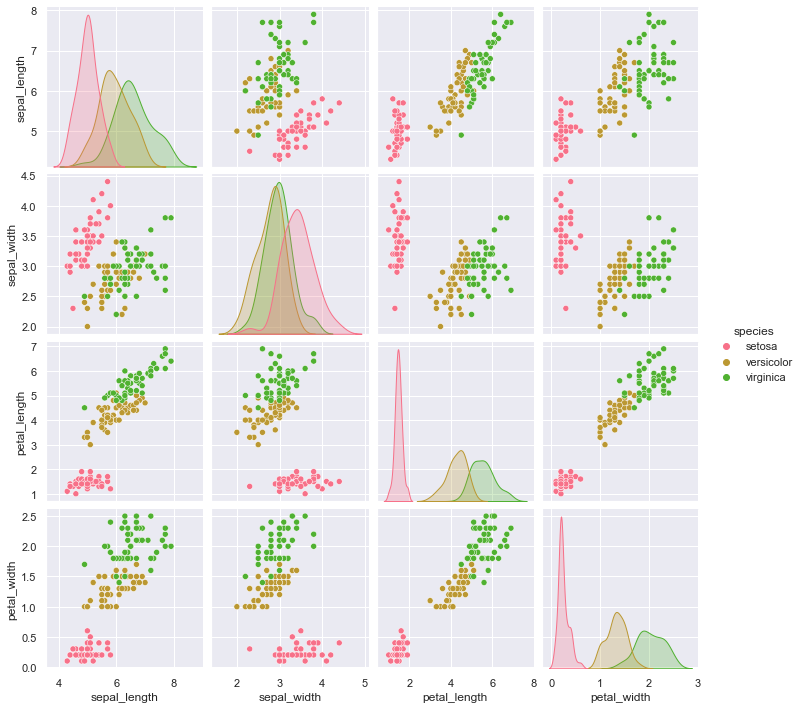

In [63]:
g = sns.pairplot(data, hue='species')
plt.show()

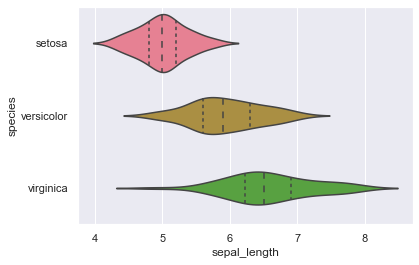

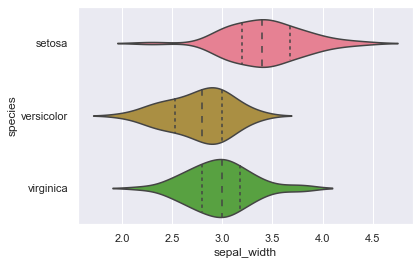

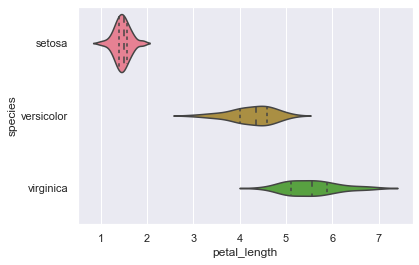

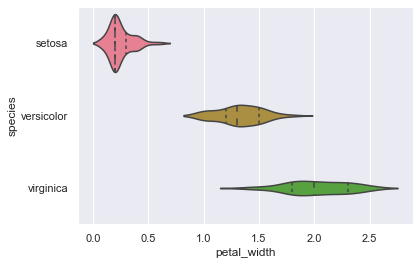

In [64]:
g = sns.violinplot(y='species', x='sepal_length', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='species', x='sepal_width', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='species', x='petal_length', data=data, inner='quartile')
plt.show()
g = sns.violinplot(y='species', x='petal_width', data=data, inner='quartile')
plt.show()

In [65]:
X = data.drop('species', axis=1)
y = data['species']
# print(X.head())
print(X.shape)
# print(y.head())
print(y.shape)

(150, 4)
(150,)


## 동일한 데이터 세트에서 train과 test 

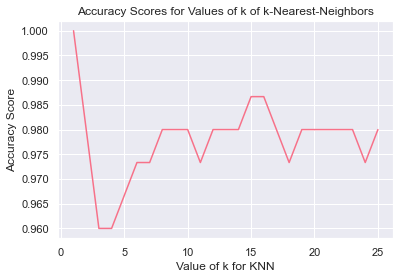

In [66]:
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X, y)
    y_pred = knn.predict(X)
    scores.append(metrics.accuracy_score(y, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [67]:
logreg = LogisticRegression()
logreg.fit(X, y)
y_pred = logreg.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.9733333333333334


## train과 test을 나누어서 

### 장점
- 두 데이터 셋에서 서로 다른 결과가 나올 것이다.
- 전체 데이터 셋을 사용하는 것보다 유동적이고 빠르다.(more flexible & faster)

### 단점
- 테스트마다 모델 성능 지표인 정확도가 달라질 수 있다. 
- 위의 단점을 k-fold 교차검증을 이용해서 해소할 수 있다.

### 주의
- 정확도는 random_state에 의존한다
- 모델이 복잡해질수록 훈련 데이터 셋의 정확도는 올라간다.
- 모델이 너무 과도하게 복잡하거나 또는 적당히 복잡하지 않으면(too complex or not complex enough), 테스트 셋의 정확도는 내려간다.
- KNN 모델의 경우, k 값이 복잡도를 결정한다. k가 낮을수록(lower value of k), 모델은 더 복잡해진다.(more complex) 

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(90, 4)
(90,)
(60, 4)
(60,)


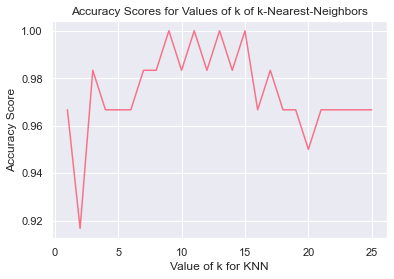

In [69]:
# experimenting with different n values
k_range = list(range(1,26))
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
    
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [70]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9833333333333333


In [71]:
knn = KNeighborsClassifier(n_neighbors=12)
knn.fit(X, y)

# make a prediction for an example of an out-of-sample observation
knn.predict([[6, 3, 4, 2]])

array(['versicolor'], dtype=object)

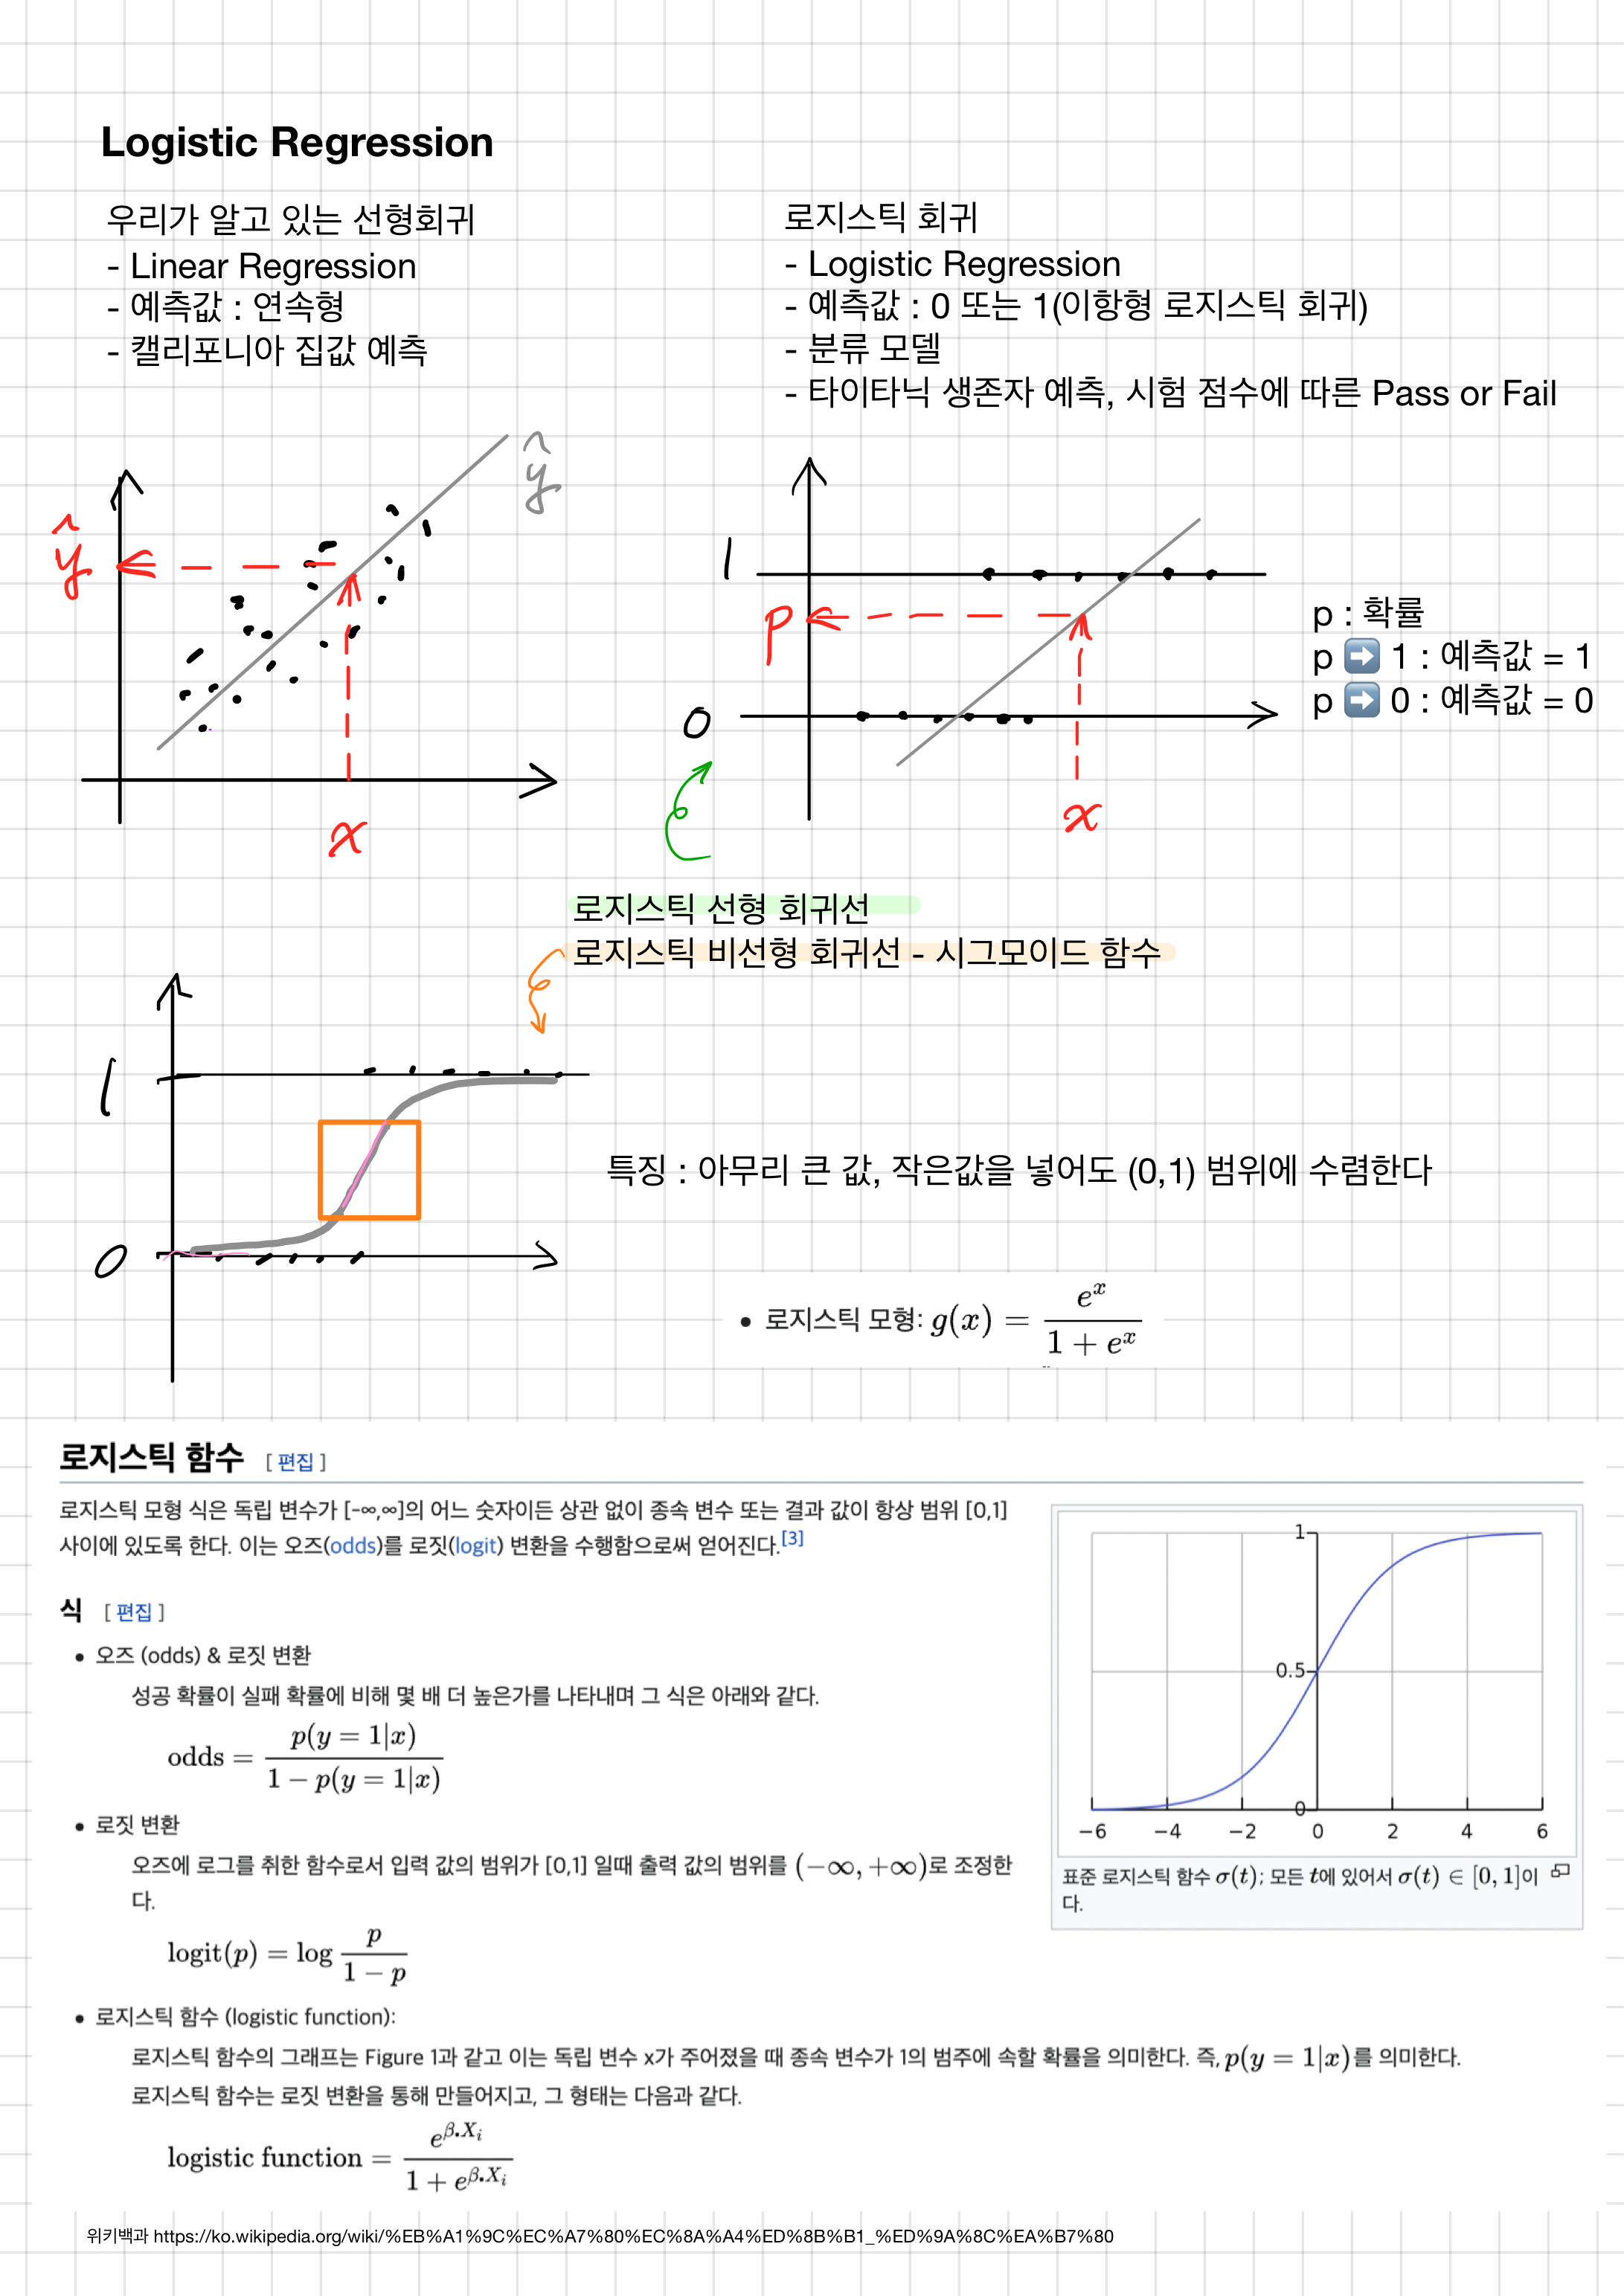